# TASK-4 : SALES PREDICTION USING PYTHON

## AIM:

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [4]:
df= pd.read_csv("advertising.csv")

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [7]:
df.shape

(200, 4)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
df.duplicated().sum()

0

## Visualisation

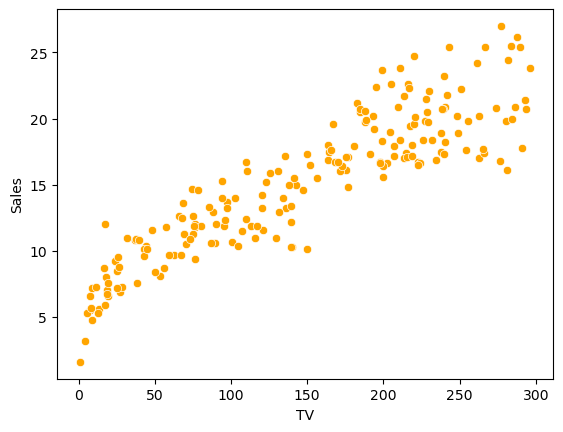

In [61]:
sns.scatterplot(x=df['TV'], y=df['Sales'], color='orange')
plt.show()

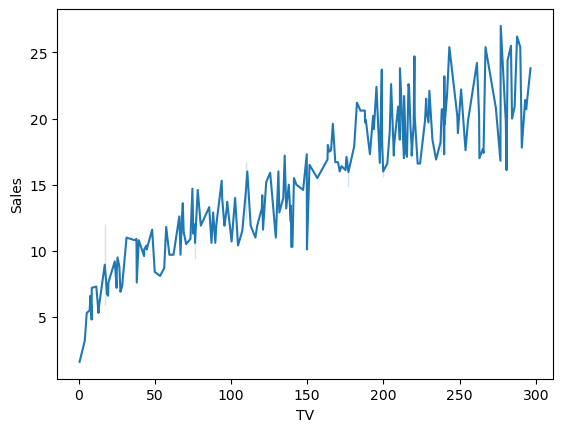

In [38]:
sns.lineplot(x=df['TV'], y=df['Sales'], data=df)
plt.show()

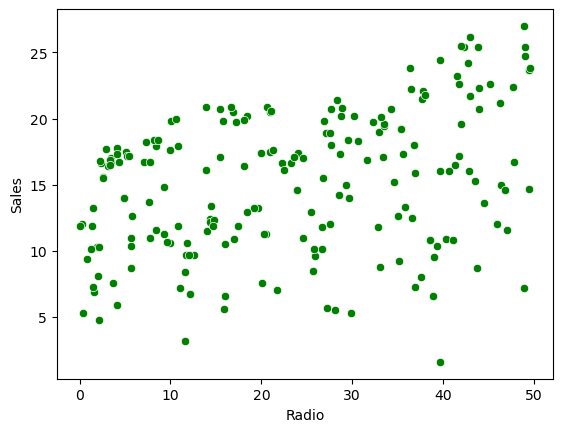

In [24]:
sns.scatterplot(x=df['Radio'], y=df['Sales'], color='g')
plt.show()

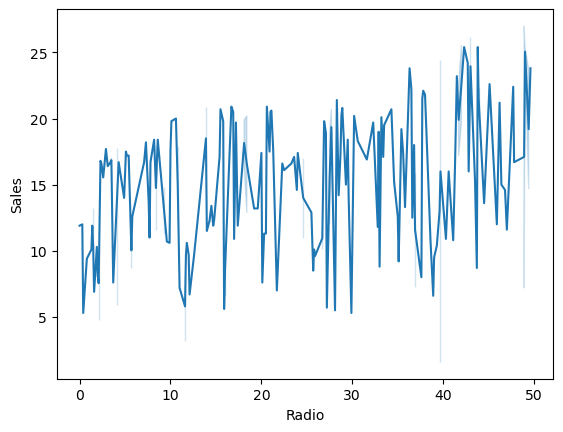

In [50]:
sns.lineplot(x=df['Radio'], y=df['Sales'], data=df)
plt.show()

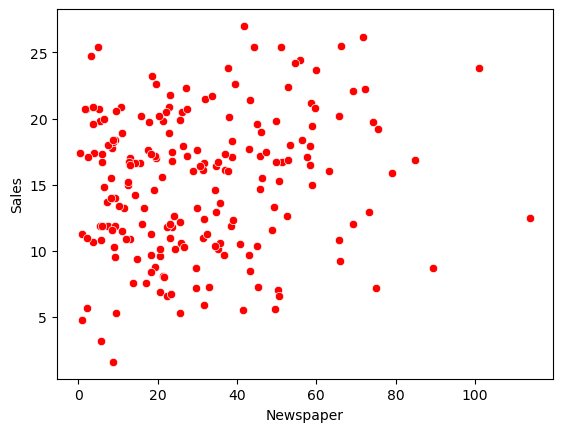

In [26]:
sns.scatterplot(x=df['Newspaper'], y=df['Sales'], color='r')
plt.show()

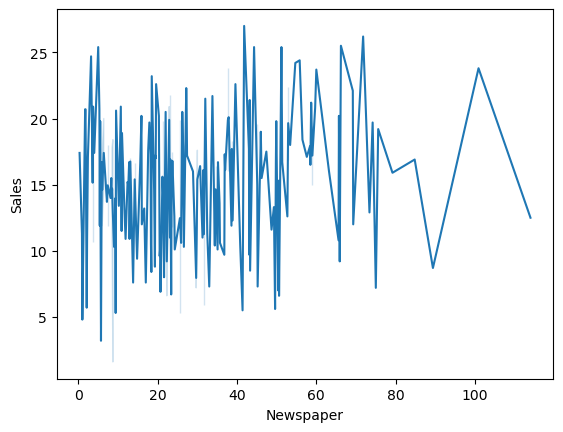

In [52]:
sns.lineplot(x=df['Newspaper'], y=df['Sales'], data=df)
plt.show()

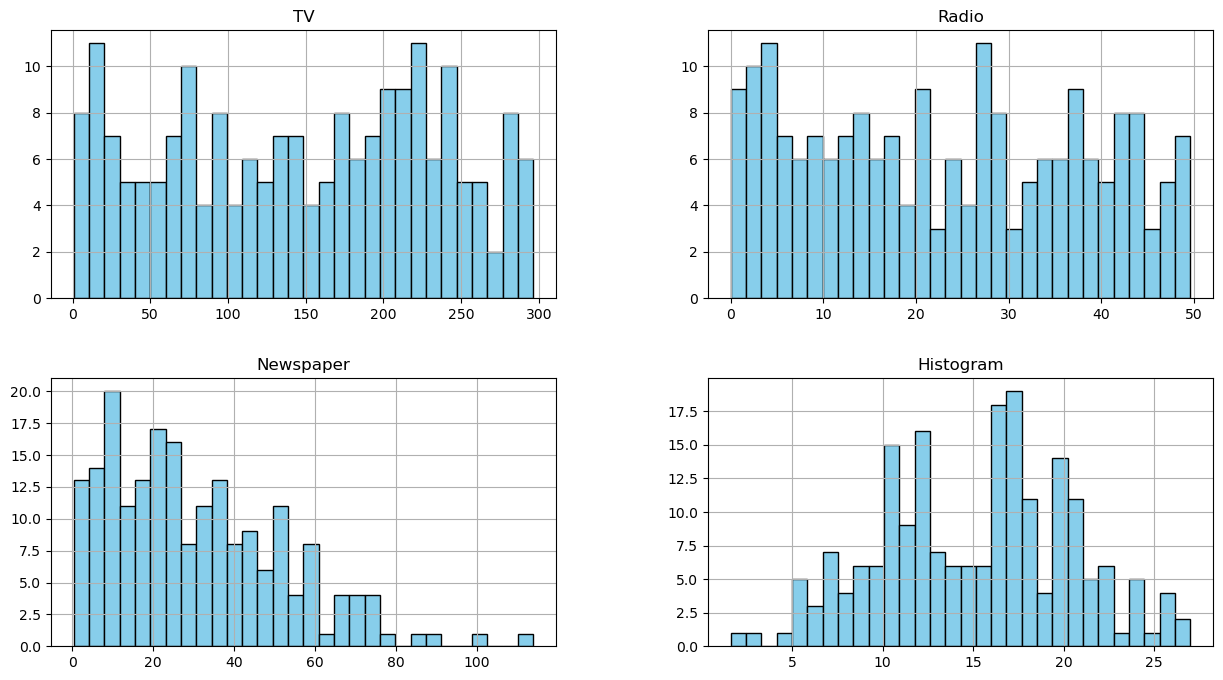

In [40]:
df.hist(bins=30, figsize=(15, 8), color='skyblue', edgecolor='black')
plt.title("Histogram")
plt.show()

## Standard Scaler

In [64]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler= StandardScaler()

In [68]:
x= df.drop('Sales', axis=1)

In [70]:
y= df['Sales']

In [72]:
x_scaled= scaler.fit_transform(x)

In [74]:
x_scaled = pd.DataFrame(scaler.transform(x), columns=x.columns)
x_scaled.head()

,TV,Radio,Newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


In [76]:
x_scaled.corr()

,TV,Radio,Newspaper
TV,1.000000,0.054809,0.056648
Radio,0.054809,1.000000,0.354104
Newspaper,0.056648,0.354104,1.000000


## VIF

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['Features']=x.columns
print(vif)

        VIF   Features
0  1.004611         TV
1  1.144952      Radio
2  1.145187  Newspaper


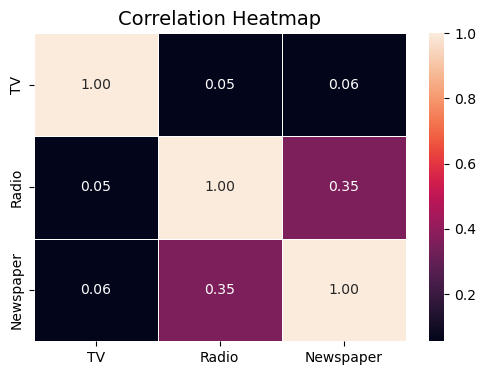

In [95]:
plt.figure(figsize=(6,4))
sns.heatmap(x_scaled.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

## Train Test Split 

In [106]:
from sklearn.model_selection import train_test_split

In [108]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [120]:
x_train.head(2)

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4


In [122]:
x_test.head(2)

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9


In [124]:
y_train.head(2)

79     11.0
197    14.8
Name: Sales, dtype: float64

In [126]:
y_test.head(2)

95    16.9
15    22.4
Name: Sales, dtype: float64

## Linear Regression

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [142]:
ln= LinearRegression()
ln.fit(x_train, y_train)

LinearRegression()

In [155]:
test_x_pred=ln.predict(x_test)

In [157]:
train_x_pred=ln.predict(x_train)

In [159]:
print("r2_score of test data:",r2_score(y_test, test_x_pred))

r2_score of test data: 0.9059011844150826


In [161]:
print("r2_score of train data:",r2_score(y_train, train_x_pred))

r2_score of train data: 0.9001416005862131


## KNN

In [167]:
from sklearn.neighbors import KNeighborsRegressor

In [169]:
knn= KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [175]:
test_x_pred= knn.predict(x_test)

In [177]:
print("r2_score of test data:",r2_score(y_test, test_x_pred))

r2_score of test data: 0.8991773755626823


In [179]:
train_x_pred= knn.predict(x_train)

In [181]:
print("r2_score of train data:",r2_score(y_train, train_x_pred))

r2_score of train data: 0.9364062585473988


## Test the Prediction

In [184]:
new_data= pd.DataFrame({"TV":[245.1],"Radio":[51.5],"Newspaper":[66.9]})

In [186]:
prediction= knn.predict(new_data)

In [190]:
print("Sales:",prediction)

Sales: [22.14]
